In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load Dataset 1
data_1 = pd.read_csv('Dataset1.csv')

# Encoding categorical variables using pd.Categorical
data_1['gender'] = pd.Categorical(data_1['gender'], categories=['Female', 'Male']).codes
data_1['ever_married'] = pd.Categorical(data_1['ever_married'], categories=['No', 'Yes']).codes
data_1['Residence_type'] = pd.Categorical(data_1['Residence_type'], categories=['Rural', 'Urban']).codes
data_1['smoking_status'] = pd.Categorical(data_1['smoking_status'], categories=['never smoked', 'formerly smoked', 'smokes']).codes
data_1['work_type'] = pd.Categorical(data_1['work_type'], categories=['Never_worked', 'children', 'Govt_job', 'Self-employed', 'Private']).codes

# Fill missing values for numerical columns with the median
numerical_cols = data_1.select_dtypes(include=['int64', 'float64']).columns
data_1[numerical_cols] = data_1[numerical_cols].fillna(data_1[numerical_cols].median())

# Fill missing values for categorical columns with the mode (most frequent value)
categorical_cols = data_1.select_dtypes(include=['object']).columns

# Checking if there are any categorical columns with missing values
if len(categorical_cols) > 0:
    data_1[categorical_cols] = data_1[categorical_cols].fillna(data_1[categorical_cols].mode().iloc[0])

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data_1, drop_first=True)

# Standardizing the Data
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

scaler = StandardScaler()
data_1[numerical_columns] = scaler.fit_transform(data_1[numerical_columns])


# Defining Features and Target Variable
x_data_1 = data_1.drop(['id','stroke'], axis = 1)
y_data_1 = data_1['stroke']

print(data_1.info())

#splitting the data into train and test sets
X_data_1_train, X_data_1_test, y_data_1_train, y_data_1_test = train_test_split(x_data_1, y_data_1, test_size=0.2, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int8   
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int8   
 6   work_type          5110 non-null   int8   
 7   Residence_type     5110 non-null   int8   
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int8   
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), int8(5)
memory usage: 304.5 KB
None


Logistic Regression data 1 Accuracy: 0.7632093933463796
              precision    recall  f1-score   support

           0       0.98      0.76      0.86       960
           1       0.17      0.74      0.28        62

    accuracy                           0.76      1022
   macro avg       0.57      0.75      0.57      1022
weighted avg       0.93      0.76      0.82      1022



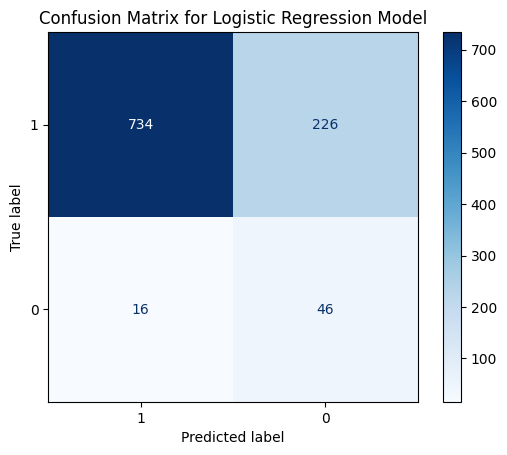

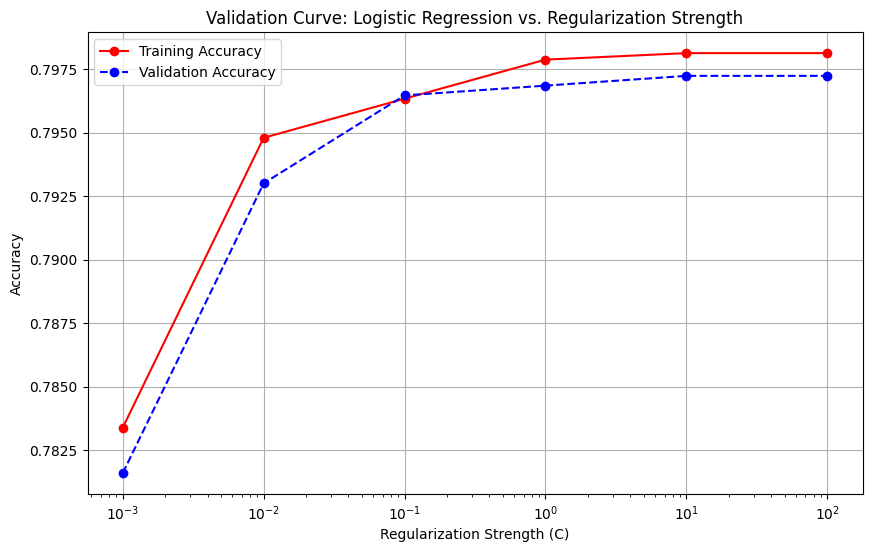

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE  # Import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_data_1_train, y_data_1_train)

# Logistic Regression on the resampled dataset
log_reg_data_1 = LogisticRegression(random_state=1, max_iter=1000)
log_reg_data_1.fit(X_resampled, y_resampled)
y_pred_data_1 = log_reg_data_1.predict(X_data_1_test)

# Print Results for the resampled dataset
print("Logistic Regression data 1 Accuracy:", accuracy_score(y_data_1_test, y_pred_data_1))
print(classification_report(y_data_1_test, y_pred_data_1))

# Confusion metrics for dataset 1
conf_matrix_log_reg = confusion_matrix(y_data_1_test, y_pred_data_1)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_log_reg, display_labels=['1', '0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# Step 2: Define the range of regularization strengths to evaluate (C values)
c_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Step 3: Calculate training and validation accuracies for different values of C
train_scores = []
validation_scores = []

for c in c_values:
    # Initialize Logistic Regression model with the current value of C
    log_reg = LogisticRegression(C=c, random_state=1, max_iter=1000, class_weight='balanced')  # Added class_weight

    # Calculate cross-validated training scores
    log_reg.fit(X_resampled, y_resampled)  # Fit on resampled data
    train_scores.append(log_reg.score(X_resampled, y_resampled))

    # Calculate cross-validated validation scores using 5-fold cross-validation
    val_score = cross_val_score(log_reg, X_resampled, y_resampled, cv=5)  # Use resampled data for validation
    validation_scores.append(val_score.mean())

# Step 4: Plotting the Validation Curve
plt.figure(figsize=(10, 6))
plt.plot(c_values, train_scores, marker='o', linestyle='-', color='r', label='Training Accuracy')
plt.plot(c_values, validation_scores, marker='o', linestyle='--', color='b', label='Validation Accuracy')
plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Validation Curve: Logistic Regression vs. Regularization Strength')
plt.legend(loc='best')
plt.grid()
plt.show()

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load Dataset 1
data_1 = pd.read_csv('Dataset1.csv')

# Encoding categorical variables using pd.Categorical
data_1['gender'] = pd.Categorical(data_1['gender'], categories=['Female', 'Male']).codes
data_1['ever_married'] = pd.Categorical(data_1['ever_married'], categories=['No', 'Yes']).codes
data_1['Residence_type'] = pd.Categorical(data_1['Residence_type'], categories=['Rural', 'Urban']).codes
data_1['smoking_status'] = pd.Categorical(data_1['smoking_status'], categories=['never smoked', 'formerly smoked', 'smokes']).codes
data_1['work_type'] = pd.Categorical(data_1['work_type'], categories=['Never_worked', 'children', 'Govt_job', 'Self-employed', 'Private']).codes

# Fill missing values for numerical columns with the median
numerical_cols = data_1.select_dtypes(include=['int64', 'float64']).columns
data_1[numerical_cols] = data_1[numerical_cols].fillna(data_1[numerical_cols].median())

# Fill missing values for categorical columns with the mode (most frequent value)
categorical_cols = data_1.select_dtypes(include=['object']).columns

# Checking if there are any categorical columns with missing values
if len(categorical_cols) > 0:
    data_1[categorical_cols] = data_1[categorical_cols].fillna(data_1[categorical_cols].mode().iloc[0])

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data_1, drop_first=True)

# Standardizing the Data
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Defining Features and Target Variable
x_data_1 = data_encoded.drop(['id', 'stroke'], axis=1)
y_data_1 = data_encoded['stroke']

# Splitting the data into train and test sets
X_data_1_train, X_data_1_test, y_data_1_train, y_data_1_test = train_test_split(x_data_1, y_data_1, test_size=0.2, random_state=42)

# Step 5: Define parameter grid for Logistic Regression
param_grid_logistic_regression = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'penalty': ['l2'],  # Regularization type
    'solver': ['liblinear']  # Suitable solver for small datasets
}

# Step 6: Initialize and perform GridSearchCV for Logistic Regression
logistic_regression = LogisticRegression(random_state=42)
grid_search_logistic_regression = GridSearchCV(logistic_regression, param_grid_logistic_regression, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model on training data
grid_search_logistic_regression.fit(X_data_1_train, y_data_1_train)

# Get the best parameters and evaluate on the test set
best_logistic_regression = grid_search_logistic_regression.best_estimator_
y_pred_best_logistic_regression = best_logistic_regression.predict(X_data_1_test)

# Evaluate the fine-tuned Logistic Regression model
accuracy_best_logistic_regression = accuracy_score(y_data_1_test, y_pred_best_logistic_regression)
classification_rep_best_logistic_regression = classification_report(y_data_1_test, y_pred_best_logistic_regression)
best_params_logistic_regression = grid_search_logistic_regression.best_params_

# Display the best parameters and model performance
print("Best parameters for Logistic Regression:", best_params_logistic_regression)
print("Accuracy of the best Logistic Regression model:", accuracy_best_logistic_regression)
print("Classification report:\n", classification_rep_best_logistic_regression)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for Logistic Regression: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy of the best Logistic Regression model: 0.9393346379647749
Classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


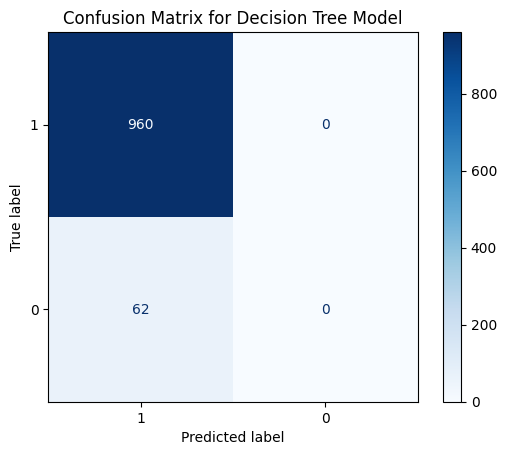

In [39]:
# Confusion metrics for dataset 1
conf_matrix_dt = confusion_matrix(y_data_1_test, y_pred_best_logistic_regression)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=['1', '0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

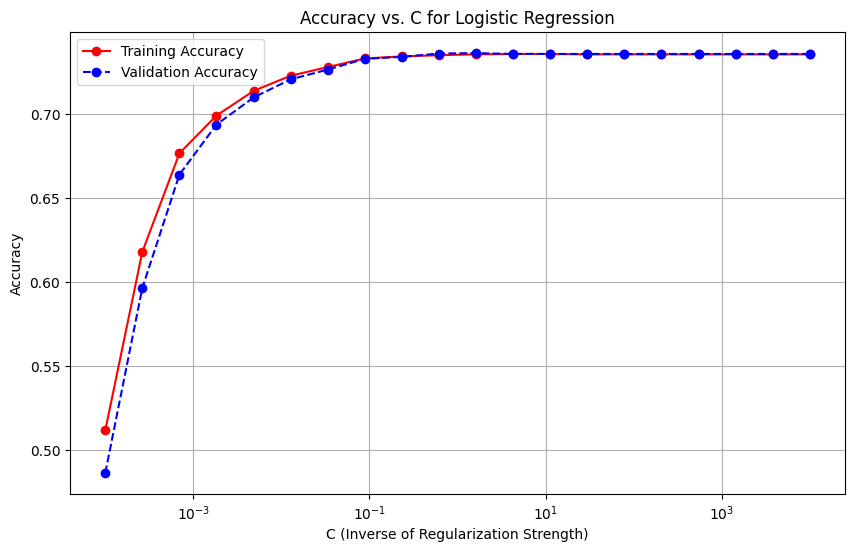

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Step 1: Extract the best parameters from GridSearchCV
best_params = grid_search_logistic_regression.best_params_
best_solver = best_params['solver']  # In case you want to use the best solver
# Note: Logistic Regression doesn't have min_samples_split or min_samples_leaf

# Step 2: Define the range of C values to evaluate (inverse of regularization strength)
c_values = np.logspace(-4, 4, 20)  # 20 values from 0.0001 to 10000

# Step 3: Initialize lists for storing training and validation accuracies
train_scores = []
validation_scores = []

# Step 4: Calculate training and validation accuracies for different C values
for c in c_values:
    # Initialize Logistic Regression with the current C value and best solver
    log_reg = LogisticRegression(C=c, solver=best_solver, random_state=42, class_weight='balanced')

    # Train the model on the full training set
    log_reg.fit(X_data_1_train, y_data_1_train)

    # Calculate training accuracy
    train_acc = log_reg.score(X_data_1_train, y_data_1_train)
    train_scores.append(train_acc)

    # Perform cross-validation to get validation accuracy
    val_acc = cross_val_score(log_reg, X_data_1_train, y_data_1_train, cv=5, scoring='accuracy').mean()
    validation_scores.append(val_acc)

# Step 5: Plotting the accuracy vs. C values
plt.figure(figsize=(10, 6))
plt.plot(c_values, train_scores, marker='o', linestyle='-', color='r', label='Training Accuracy')
plt.plot(c_values, validation_scores, marker='o', linestyle='--', color='b', label='Validation Accuracy')
plt.xscale('log')  # Use logarithmic scale for better visualization
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C for Logistic Regression')
plt.legend(loc='best')
plt.grid()
plt.show()

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load Dataset 2
data_2 = pd.read_csv('Dataset2.csv')


# Fill missing values for numerical columns with the median
numerical_cols = data_2.select_dtypes(include=['int64', 'float64']).columns
data_2[numerical_cols] = data_2[numerical_cols].fillna(data_2[numerical_cols].median())

# Standardizing the Data
numerical_columns = ['DistanceFromCompany','InterviewScore',  'SkillScore', 'PersonalityScore']

scaler = StandardScaler()
data_2[numerical_columns] = scaler.fit_transform(data_2[numerical_columns])

# Defining Features and Target Variable
x_data_2 = data_2.drop(['HiringDecision'], axis = 1)
y_data_2 = data_2['HiringDecision']

print(data_2.info())

#splitting the data into train and test sets
X_data_2_train, X_data_2_test, y_data_2_train, y_data_2_test = train_test_split(x_data_2, y_data_2, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   float64
 7   SkillScore           1500 non-null   float64
 8   PersonalityScore     1500 non-null   float64
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 129.0 KB
None


Logistic Regression data 2 Accuracy: 0.7966666666666666
              precision    recall  f1-score   support

           0       0.94      0.77      0.84       215
           1       0.60      0.87      0.71        85

    accuracy                           0.80       300
   macro avg       0.77      0.82      0.78       300
weighted avg       0.84      0.80      0.81       300



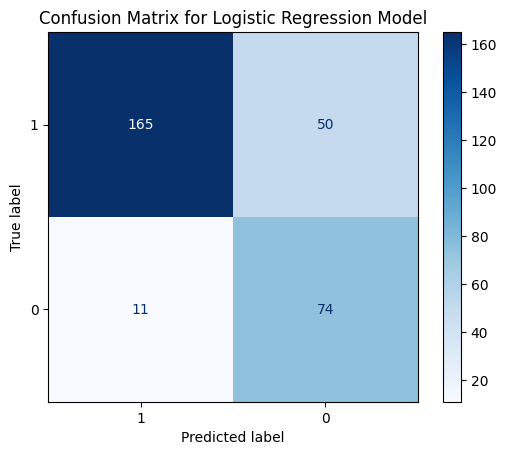

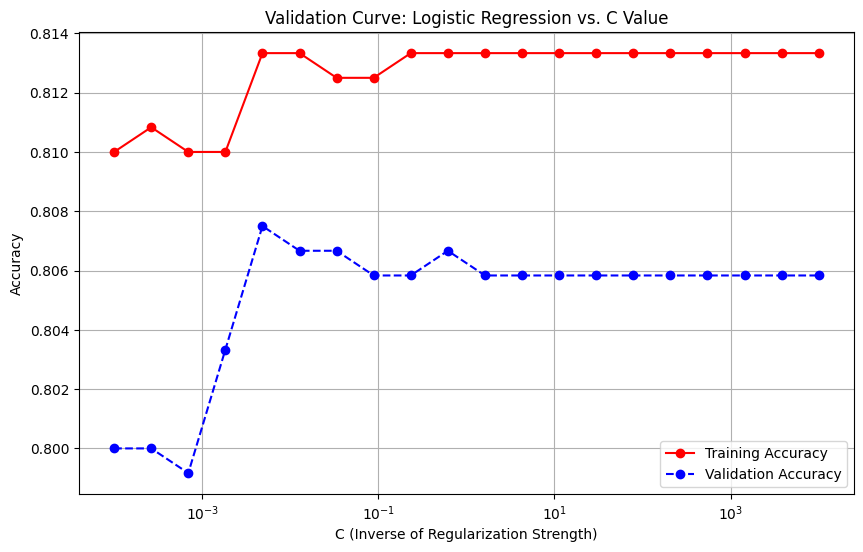

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Scale your features
scaler = StandardScaler()
X_data_2_train_scaled = scaler.fit_transform(X_data_2_train)
X_data_2_test_scaled = scaler.transform(X_data_2_test)

# Step 2: Logistic Regression on the scaled dataset
log_reg_data_2 = LogisticRegression(random_state=1, class_weight='balanced', max_iter=200)  # Increase max_iter
log_reg_data_2.fit(X_data_2_train_scaled, y_data_2_train)
y_pred_data_2 = log_reg_data_2.predict(X_data_2_test_scaled)

print("Logistic Regression data 2 Accuracy:", accuracy_score(y_data_2_test, y_pred_data_2))
print(classification_report(y_data_2_test, y_pred_data_2))

# Confusion metrics for dataset 2
conf_matrix_log_reg = confusion_matrix(y_data_2_test, y_pred_data_2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_log_reg, display_labels=['1', '0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# Step 3: Define the range of C values to evaluate (inverse of regularization strength)
c_values = np.logspace(-4, 4, 20)  # 20 values from 0.0001 to 10000

# Step 4: Calculate training and validation accuracies for different C values
train_scores = []
validation_scores = []

for c in c_values:
    # Initialize Logistic Regression model with the current value of C
    log_reg = LogisticRegression(C=c, random_state=1, class_weight='balanced', max_iter=200)

    # Fit the model on the scaled training data
    log_reg.fit(X_data_2_train_scaled, y_data_2_train)

    # Calculate training score
    train_scores.append(log_reg.score(X_data_2_train_scaled, y_data_2_train))

    # Calculate cross-validated validation scores using 5-fold cross-validation
    val_score = cross_val_score(log_reg, X_data_2_train_scaled, y_data_2_train, cv=5)
    validation_scores.append(val_score.mean())

# Step 5: Plotting the Validation Curve
plt.figure(figsize=(10, 6))
plt.plot(c_values, train_scores, marker='o', linestyle='-', color='r', label='Training Accuracy')
plt.plot(c_values, validation_scores, marker='o', linestyle='--', color='b', label='Validation Accuracy')
plt.xscale('log')  # Use logarithmic scale for C values
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Validation Curve: Logistic Regression vs. C Value')
plt.legend(loc='best')
plt.grid()
plt.show()

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load Dataset 2
data_2 = pd.read_csv('Dataset2.csv')

# Fill missing values for numerical columns with the median
numerical_cols = data_2.select_dtypes(include=['int64', 'float64']).columns
data_2[numerical_cols] = data_2[numerical_cols].fillna(data_2[numerical_cols].median())

# Standardizing the Data
numerical_columns = ['DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']

scaler = StandardScaler()
data_2[numerical_columns] = scaler.fit_transform(data_2[numerical_columns])

# Defining Features and Target Variable
x_data_2 = data_2.drop(['HiringDecision'], axis=1)
y_data_2 = data_2['HiringDecision']

# Splitting the data into train and test sets
X_data_2_train, X_data_2_test, y_data_2_train, y_data_2_test = train_test_split(x_data_2, y_data_2, test_size=0.2, random_state=42)

# Step 5: Define parameter grid for Logistic Regression
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10, 100],  # Different values for inverse of regularization strength
    'solver': ['lbfgs', 'liblinear']  # Different solvers to try
}

# Step 6: Initialize and perform GridSearchCV for Logistic Regression
logistic_regression = LogisticRegression(random_state=42, class_weight='balanced')  # Using class_weight for imbalance
grid_search_logistic = GridSearchCV(logistic_regression, param_grid_logistic, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model on training data
grid_search_logistic.fit(X_data_2_train, y_data_2_train)

# Get the best parameters and evaluate on the test set
best_logistic_regression = grid_search_logistic.best_estimator_
y_pred_best_logistic = best_logistic_regression.predict(X_data_2_test)

# Evaluate the fine-tuned Logistic Regression model
accuracy_best_logistic = accuracy_score(y_data_2_test, y_pred_best_logistic)
classification_rep_best_logistic = classification_report(y_data_2_test, y_pred_best_logistic)
best_params_logistic = grid_search_logistic.best_params_

# Display the best parameters and model performance
print("Best parameters for Logistic Regression:", best_params_logistic)
print("Accuracy of the best Logistic Regression model:", accuracy_best_logistic)
print("Classification report:\n", classification_rep_best_logistic)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Accuracy of the best Logistic Regression model: 0.7966666666666666
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.77      0.84       215
           1       0.60      0.87      0.71        85

    accuracy                           0.80       300
   macro avg       0.77      0.82      0.78       300
weighted avg       0.84      0.80      0.81       300



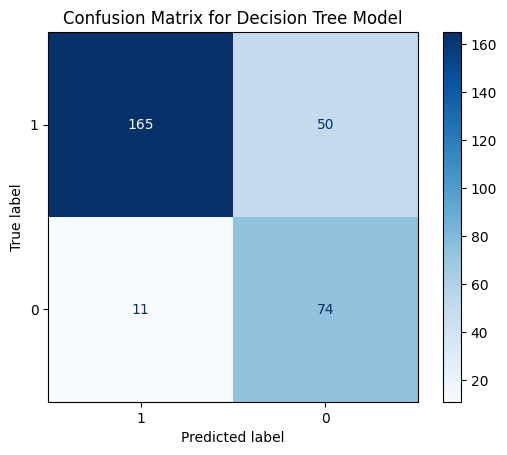

In [44]:
# Confusion metrics for dataset 2
conf_matrix_dt = confusion_matrix(y_data_2_test, y_pred_best_logistic)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=['1', '0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

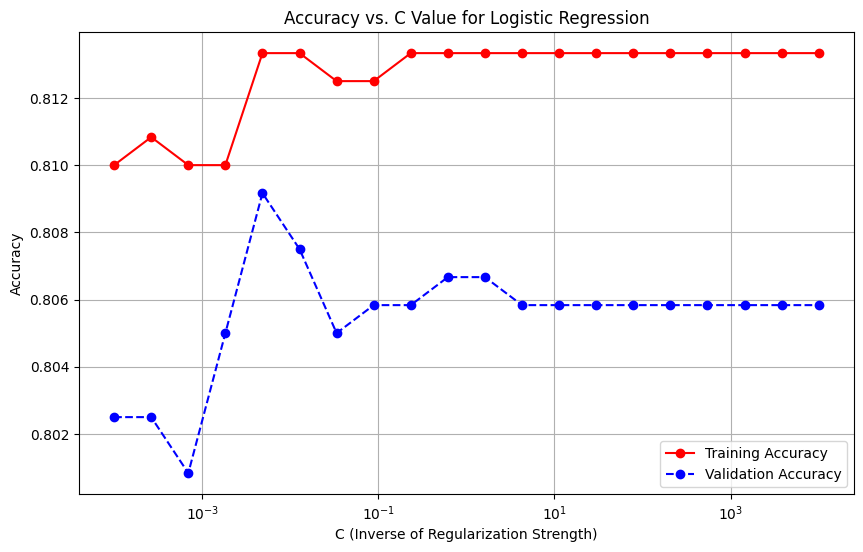

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract the best parameters from GridSearchCV
best_params = grid_search_logistic.best_params_
best_solver = best_params['solver']
best_C = best_params['C']

# Step 2: Define the range of C values to evaluate
c_values = np.logspace(-4, 4, 20)  # Range for C (inverse of regularization strength)

# Step 3: Initialize lists for storing training and validation accuracies
train_scores = []
validation_scores = []

# Step 4: Calculate training and validation accuracies for different C values
for c in c_values:
    # Create a pipeline with scaling and logistic regression
    log_reg = make_pipeline(
        StandardScaler(),
        LogisticRegression(C=c, solver=best_solver, random_state=42,
                           class_weight='balanced', max_iter=200)  # Increase max_iter
    )

    # Train the model on the full training set
    log_reg.fit(X_data_2_train, y_data_2_train)

    # Calculate training accuracy
    train_acc = log_reg.score(X_data_2_train, y_data_2_train)
    train_scores.append(train_acc)

    # Perform cross-validation to get validation accuracy
    val_acc = cross_val_score(log_reg, X_data_2_train, y_data_2_train, cv=5, scoring='accuracy').mean()
    validation_scores.append(val_acc)

# Step 5: Plotting the accuracy vs. C values
plt.figure(figsize=(10, 6))
plt.plot(c_values, train_scores, marker='o', linestyle='-', color='r', label='Training Accuracy')
plt.plot(c_values, validation_scores, marker='o', linestyle='--', color='b', label='Validation Accuracy')
plt.xscale('log')  # Use logarithmic scale for C values
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C Value for Logistic Regression')
plt.legend(loc='best')
plt.grid()
plt.show()